In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import ipywidgets as widgets
from IPython.display import display

In [ ]:
data = pd.read_csv("/content/agricultural project dataset.csv")

In [ ]:
# Data preprocessing
x = data.drop(['label'], axis=1)
y = data['label']

# Splitting the dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Training the model
model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)

# Function to predict crop based on user input
def predict_crop(N, P, K, temperature, humidity, ph, rainfall):
    prediction = model.predict(np.array([[N, P, K, temperature, humidity, ph, rainfall]]))
    print(f'The suggested crop for given climatic condition is: {prediction[0]}')


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print("shape of the dataset ",data.shape)#to know how many rows and columns our dataset has

shape of the dataset  (2200, 8)


In [ ]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [ ]:
"in the above dataset there are no missing values but in case we have a dataset with missing value we can use function Fill-NA or drop-NA as pandas have these functions to deal with missing values"

'in the above dataset there are no missing values but in case we have a dataset with missing value we can use function Fill-NA or drop-NA as pandas have these functions to deal with missing values'

In [ ]:
data['label'].value_counts(),#provides us with the occurence of unique values in a column

(label
 rice           100
 maize          100
 jute           100
 cotton         100
 coconut        100
 papaya         100
 orange         100
 apple          100
 muskmelon      100
 watermelon     100
 grapes         100
 mango          100
 banana         100
 pomegranate    100
 lentil         100
 blackgram      100
 mungbean       100
 mothbeans      100
 pigeonpeas     100
 kidneybeans    100
 chickpea       100
 coffee         100
 Name: count, dtype: int64,)

In [ ]:
#lets check the avearage requirenment of different factors for all the crops
print("Average ratio of nitrogenin the soil:{0:2f}".format(data['N'].mean()))
print("Average ratio of phosphorous the soil:{0:2f}".format(data['P'].mean()))
print("Average ratio of potassium the soil:{0:2f}".format(data['K'].mean()))
print("Average temperature in celcius:{0:2f}".format(data['temperature'].mean()))
print("Average relative humidity in %:{0:2f}".format(data['humidity'].mean()))
print("Average ph value of the soil:{0:2f}".format(data['ph'].mean()))
print("Average rainfall in mm:{0:2f}".format(data['rainfall'].mean()))



Average ratio of nitrogenin the soil:50.551818
Average ratio of phosphorous the soil:53.362727
Average ratio of potassium the soil:48.149091
Average temperature in celcius:25.616244
Average relative humidity in %:71.481779
Average ph value of the soil:6.469480
Average rainfall in mm:103.463655


In [ ]:
@interact
def summary(crops = list(data['label'].value_counts().index)):
    x = data[data['label']== crops]
    z = data.drop(['label'],axis=1)
    y = []
    y.append(z)
    for i in z:
        print('Minimum ', i, 'required', x[i].min())
        print('Average', i, 'required', x[i].mean())
        print('Maximum', i, 'required', x[i].max())
        print('--------------------------------------------------')

interactive(children=(Dropdown(description='crops', options=('rice', 'maize', 'jute', 'cotton', 'coconut', 'pa…

In [ ]:
#compare the average requirement for each crops with average conditions
@interact
def compare(crops = list(data['label'].value_counts().index)):
    x = data[data['label']== crops]
    z = data.drop(['label'],axis=1)
    y = []
    y.append(z)
    for i in z:
      print('Average', i, 'required', x[i].mean())
    print('--------------------------------------------------')

interactive(children=(Dropdown(description='crops', options=('rice', 'maize', 'jute', 'cotton', 'coconut', 'pa…

In [ ]:
@interact
def compare(conditions=['N','K','P','rainfall','temperature','ph','humidity']):
  print("crops which require greater than average ",conditions,'\n')
  print(data[data[conditions]>data[conditions].mean()]['label'].unique())
  print('--------------------------------------------------')
  print("crops which require less than average ",conditions,'\n')
  print(data[data[conditions]<data[conditions].mean()]['label'].unique())



interactive(children=(Dropdown(description='conditions', options=('N', 'K', 'P', 'rainfall', 'temperature', 'p…

array([[<Axes: title={'center': 'N'}>, <Axes: title={'center': 'P'}>,
        <Axes: title={'center': 'K'}>,
        <Axes: title={'center': 'temperature'}>],
       [<Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'ph'}>,
        <Axes: title={'center': 'rainfall'}>, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >]], dtype=object)

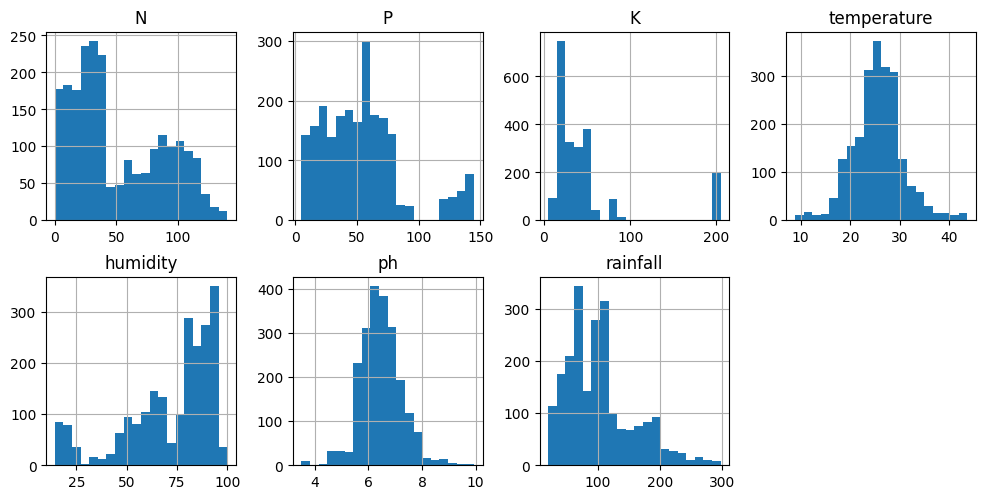

In [ ]:
data.hist(figsize=(12,12), layout=(4,4), bins=20)
#observation:
#P is right skewed
#Humidity left skewed

In [ ]:
#finding out some important patterns
#Important observation
#we can see mothbeens grow in very low and very high pH conditions so pH is not a major factor for mothbeens
print('crops which requires very high ratio of Nitrogen content in soil:', data[data['N']>120]['label'].unique())
print('crops which requires very high ratio of Phosphorous content in soil:', data[data['P']>100]['label'].unique())
print('crops which requires very high ratio of Potassium content in soil:', data[data['K']>200]['label'].unique())
print('crops which requires very high rainfall:', data[data['rainfall']>200]['label'].unique())
print('crops which requires very low temperature:', data[data['temperature']<10]['label'].unique())
print('crops which requires very high temperature:', data[data['temperature']>40]['label'].unique())
print('crops which requires very low humidity:', data[data['humidity']<20]['label'].unique())
print('crops which requires very low ph:', data[data['ph']<4]['label'].unique())
print('crops which requires very high ph:', data[data['ph']>9]['label'].unique())

crops which requires very high ratio of Nitrogen content in soil: ['cotton']
crops which requires very high ratio of Phosphorous content in soil: ['grapes' 'apple']
crops which requires very high ratio of Potassium content in soil: ['grapes' 'apple']
crops which requires very high rainfall: ['rice' 'papaya' 'coconut']
crops which requires very low temperature: ['grapes']
crops which requires very high temperature: ['grapes' 'papaya']
crops which requires very low humidity: ['chickpea' 'kidneybeans']
crops which requires very low ph: ['mothbeans']
crops which requires very high ph: ['mothbeans']


In [ ]:
#lets find the crops best for specific seasons
print(" summer crops",data[data['temperature']>30]['label'].unique())
print("winter crops",data[data['temperature']<20]['label'].unique())
print("rainy crops ",data[data['rainfall']>200]['label'].unique())

 summer crops ['pigeonpeas' 'mothbeans' 'blackgram' 'mango' 'grapes' 'orange' 'papaya']
winter crops ['maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'lentil' 'pomegranate'
 'grapes' 'orange']
rainy crops  ['rice' 'papaya' 'coconut']


In [ ]:
from sklearn.cluster import KMeans
#removing the label columns as for kmeans clustering meathod we don't require labels
x=data.drop(['label'],axis=1)
#selecting all the values of data
x=x.values
#checking the shape
x.shape

(2200, 7)

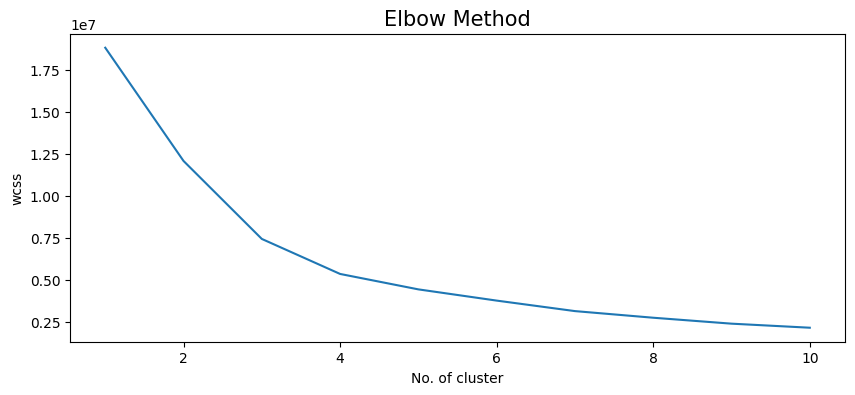

In [ ]:
#Determine Optimum number of cluster by elbow method
from sklearn.cluster import KMeans
plt.rcParams['figure.figsize'] = (10,4)
wcss = [] #An empty list is created to store the Within-Cluster-Sum-of-Squares (WCSS) values for each number of clusters.
for i in range (1,11):
    km = KMeans(n_clusters =i, init= 'k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(x)
    wcss.append(km.inertia_)   #The inertia_ attribute of the KMeans object is used to calculate the WCSS value for each value of 'i', which is then appended to the list 'wcss'.
#plot the results
plt.plot(range(1,11), wcss)
plt.title('Elbow Method', fontsize= 15)
plt.xlabel('No. of cluster')
plt.ylabel('wcss')
plt.show()

#OBSERVATION
#we get two elbows at 3 and 4. As per elbow method definition we take the last one so our no. of cluster will be #4

In [ ]:
km = KMeans(n_clusters =4, init= 'k-means++', max_iter=300, n_init=10, random_state=0)
y_means= km.fit_predict(x)
a = data['label']
y_means = pd.DataFrame(y_means)
w = pd.concat([y_means, a], axis=1)
w =w.rename(columns= {0:'cluster'})

#After performing K-means clustering on the dataset 'x' with 4 clusters and assigning each data point to its respective cluster using the
# 'fit_predict' method, the code creates a new DataFrame 'w' by concatenating the cluster assignments (stored in 'y_means') with the original 'label' column
# from the 'data' DataFrame. The 'axis=1' argument is used to concatenate the two DataFrames along the columns.

In [ ]:
for i in range(0,4): #for 4 clusters 0,1,2,3
    print('Crops is cluster', i, w[w['cluster']==i]['label'].unique())
    print('---------------------------------------------------------------------------------------')

Crops is cluster 0 ['maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans' 'mungbean'
 'blackgram' 'lentil' 'pomegranate' 'mango' 'orange' 'papaya' 'coconut']
---------------------------------------------------------------------------------------
Crops is cluster 1 ['maize' 'banana' 'watermelon' 'muskmelon' 'papaya' 'cotton' 'coffee']
---------------------------------------------------------------------------------------
Crops is cluster 2 ['grapes' 'apple']
---------------------------------------------------------------------------------------
Crops is cluster 3 ['rice' 'pigeonpeas' 'papaya' 'coconut' 'jute' 'coffee']
---------------------------------------------------------------------------------------


In [ ]:
#splitting the dataset x contains all the crops as well as the 7factors affecting the crops and y just contains all the labels that is the crops this is done to maintain the accuracy of the model
y=data['label']
x=data.drop(['label'],axis=1)
print("shape of x",x.shape)
print("shape of y",y.shape)

shape of x (2200, 7)
shape of y (2200,)


In [ ]:
#creating training and testing set splitting the dataset in the ratio of 80 and 20 where 80 percent data goes fpr training set and 20 percent for test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)
print("shape of x train",x_train.shape)
print("shape of x test",x_test.shape)
print("shape of y train",y_train.shape)
print("shape of y test",y_test.shape)


shape of x train (1760, 7)
shape of x test (440, 7)
shape of y train (1760,)
shape of y test (440,)


In [ ]:
#creating a predictive model
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train) #This line trains the logistic regression model on the training data x_train and the corresponding labels y_train.
y_pred= model.predict(x_test) #This line makes predictions on the test data x_test using the trained model and assigns the predicted labels to the variable y_pred.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


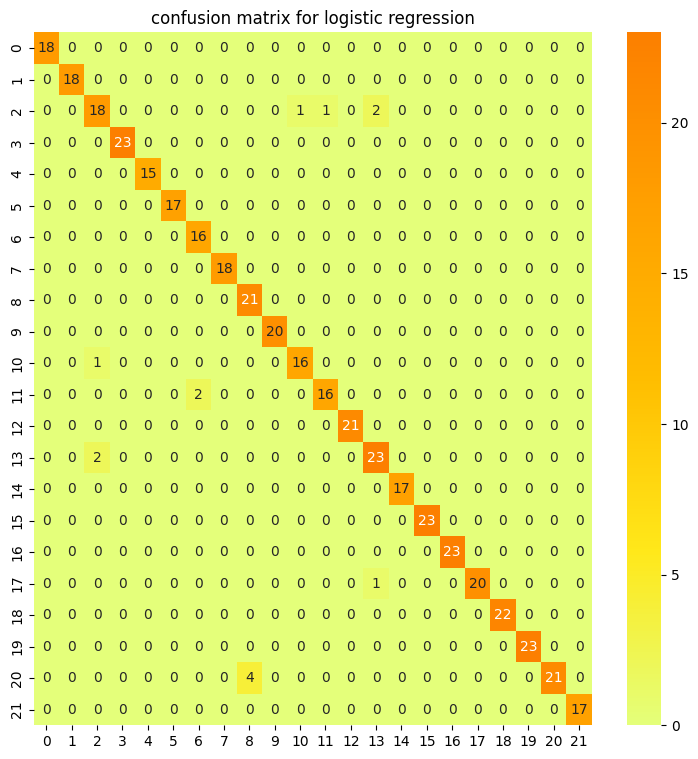

In [ ]:
#evaluating the model performance
from sklearn.metrics import accuracy_score,confusion_matrix
plt.rcParams['figure.figsize']=(9,9)
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,cmap='Wistia')
plt.title('confusion matrix for logistic regression',fontsize=12)
plt.show()


In [ ]:
#Classification report
from sklearn.metrics import classification_report
cr= classification_report (y_test,y_pred)
print(cr)
#observation
#As we can see that the precision and recall values for all the crops are high  this shows that the accuracy of our model is very good

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        18
   blackgram       0.86      0.82      0.84        22
    chickpea       1.00      1.00      1.00        23
     coconut       1.00      1.00      1.00        15
      coffee       1.00      1.00      1.00        17
      cotton       0.89      1.00      0.94        16
      grapes       1.00      1.00      1.00        18
        jute       0.84      1.00      0.91        21
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.94      0.94      0.94        17
       maize       0.94      0.89      0.91        18
       mango       1.00      1.00      1.00        21
   mothbeans       0.88      0.92      0.90        25
    mungbean       1.00      1.00      1.00        17
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        23
      papaya       1.00    

In [ ]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:

# Creating the widgets for user input
print("ADJUST THE VALUES TO GET THE PREDICTION")
N_widget = widgets.IntSlider(min=0, max=140, step=1, description='Nitrogen (N):')
P_widget = widgets.IntSlider(min=0, max=140, step=1, description='Phosphorous (P):')
K_widget = widgets.IntSlider(min=0, max=200, step=1, description='Potassium (K):')
temperature_widget = widgets.FloatSlider(min=0, max=50, step=0.1, description='Temperature (°C):')
humidity_widget = widgets.FloatSlider(min=0, max=100, step=0.1, description='Humidity (%):')
ph_widget = widgets.FloatSlider(min=0, max=14, step=0.1, description='pH:')
rainfall_widget = widgets.FloatSlider(min=0, max=300, step=1, description='Rainfall (mm):')

# Display the widgets
ui = widgets.VBox([N_widget, P_widget, K_widget, temperature_widget, humidity_widget, ph_widget, rainfall_widget])
out = widgets.interactive_output(predict_crop, {'N': N_widget, 'P': P_widget, 'K': K_widget, 'temperature': temperature_widget, 'humidity': humidity_widget, 'ph': ph_widget, 'rainfall': rainfall_widget})

display(ui, out)

ADJUST THE VALUES TO GET THE PREDICTION


Output()